In [9]:
from VSS import *

## Test case 1

In [10]:
# Test case with two tasks
tasks = [
    Task(1, 10, 2, 3),  # τ₁
    Task(2, 20, 2, 3),
    Task(3, 15, 2, 3)
]
simulation_time = 40
simulator = VSS(tasks, simulation_time)
simulator.simulate()
simulator.print_wcrt()
history = simulator.history

wcrt for task1 is 3.0

wcrt for task2 is 9.0

wcrt for task3 is 6.0



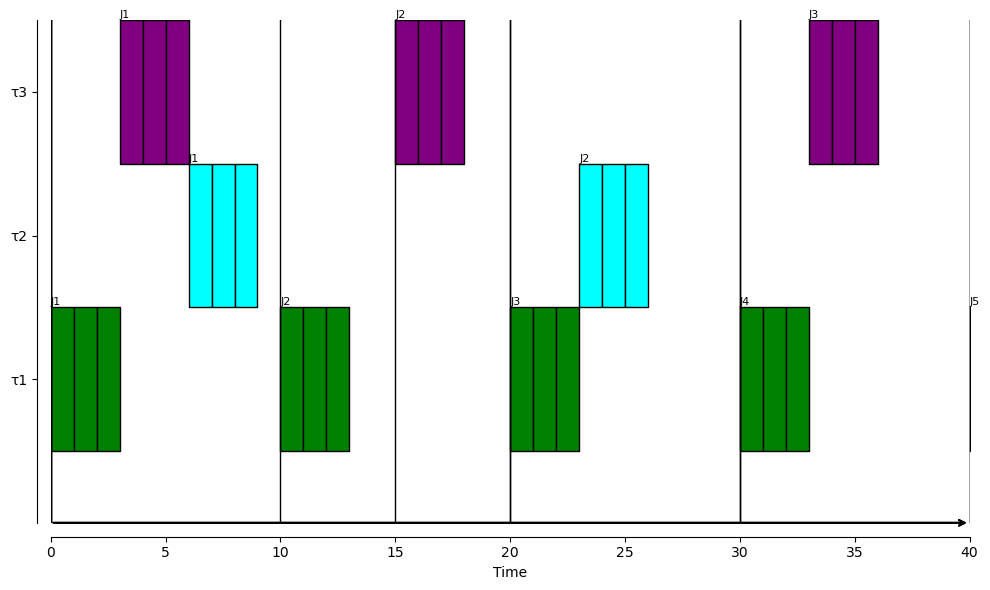

In [11]:
fig, ax = plt.subplots(figsize=(10, 2 * len(tasks)))

# Colors for tasks
colors = {1: 'green', 2: 'cyan', 3: 'purple'}

labeled_jobs = set()

# Plot execution periods
for task_id, job_id, start, end in history:
    if task_id != 0: 
        bar = ax.broken_barh(
            [(start, end - start)],
            (task_id * 10 - 5, 10),
            facecolors=colors.get(task_id, 'blue'),
            edgecolors='black',
        )

        if (task_id, job_id) not in labeled_jobs:
            job_segments = [
                (s, e) for t, j, s, e in history
                if t == task_id and j == job_id
            ]
            if job_segments:
                label_x = job_segments[0][0]
                ax.text(
                    label_x, task_id * 10 + 5, f"J{job_id}",
                    color='black', fontsize=8, verticalalignment='bottom'
                )
                labeled_jobs.add((task_id, job_id))

for task in tasks:
    for job in task.jobs:
        ax.axvline(x=job.release_time, color='black', linestyle='-', linewidth=1)

ax.set_ylim(0, (len(tasks) * 10) + 5)
ax.set_xlim(0, simulation_time)
ax.set_yticks([i * 10 for i in range(1, len(tasks) + 1)])
ax.set_yticklabels([f'τ{i}' for i in range(1, len(tasks) + 1)])
ax.set_xlabel('Time')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))

ax.annotate('', xy=(simulation_time, 0), xytext=(0, 0),
        xycoords='data', textcoords='data',
        arrowprops=dict(arrowstyle='->', lw=1.5))
ax.annotate('', xy=(0, 0), xytext=(simulation_time, 0),
        xycoords='data', textcoords='data',
        arrowprops=dict(arrowstyle='<-', lw=1.5))

plt.tight_layout()
plt.show()